In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#### cargar el dataset

In [20]:
df = pd.read_csv('../data/Titanic-Dataset.csv', index_col='PassengerId')
df.head(20)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S


#### informacion del dataset

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [22]:
df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


#### consultando y eliminando duplicados

In [23]:
duplicados = df.duplicated().sum()
if duplicados > 0:
    print('se encontraron {duplicados} filas duplicadas. Procediendo a eliminarlas')
    df.drop_duplicates(inplace=True)
else:
    print('no se encontraron filas duplicadas. No es necesario eliminarlas')

print('dimensiones tras el paso de duplicados:', df.shape)

no se encontraron filas duplicadas. No es necesario eliminarlas
dimensiones tras el paso de duplicados: (891, 11)


#### identificando y eliminado nulos

In [24]:
nulos_columnas = df.isnull().sum()
nulos_filas = df[df.isnull().any(axis=1)] # eje x
total_nulos = nulos_columnas.sum()

nulos_columnas


Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

#### imputacion y eliminacion

In [25]:
if nulos_columnas['Age'] > 0:
    df['Age'] = df['Age'].fillna(df['Age'].median())
    print('reemplazo de nulos por la mediana!:')
else:
    print('no hay valores nulos que limpiar')

if nulos_columnas['Embarked'] > 0:
    df.dropna(subset=['Embarked'], inplace=True)
    print('limpieza de nulos completada')
else:
    print('no hay valores nulos que limpiar')

if nulos_columnas['Survived'] > 0:
    df.dropna(subset=['Survived'], inplace=True)
    print('limpieza de nulos completada!')
else:
    print('no hay valores nulosque limpiar')

reemplazo de nulos por la mediana!:
limpieza de nulos completada
no hay valores nulosque limpiar


#### reto 4, grafico de barras supervivientes

<function matplotlib.pyplot.show(close=None, block=None)>

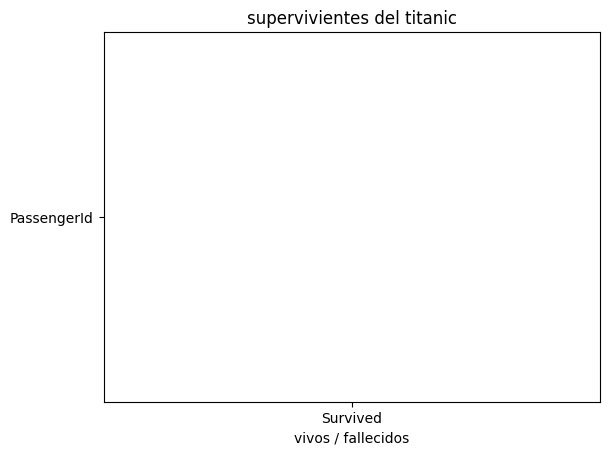

In [69]:
plt.bar(['Survived'], ['PassengerId'])
plt.title('supervivientes del titanic')
plt.xlabel('vivos / fallecidos') 
plt.ylabel('')

plt.show

#### reto 4 resuelto

In [ ]:
plt.Figure()